In [16]:
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from DataProcTools.DataCleaning import MissingValues

In [10]:
dataset = pd.read_csv('./data/athlete_events.csv')

# Initial dataset info before imputation
dataset.info()
dataset.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [11]:
print(dataset.describe())
missingValuesInfo = MissingValues.get_nan_values_percentage(dataset)
print()
print(missingValuesInfo)

                  ID            Age         Height         Weight  \
count  271116.000000  261642.000000  210945.000000  208241.000000   
mean    68248.954396      25.556898     175.338970      70.702393   
std     39022.286345       6.393561      10.518462      14.348020   
min         1.000000      10.000000     127.000000      25.000000   
25%     34643.000000      21.000000     168.000000      60.000000   
50%     68205.000000      24.000000     175.000000      70.000000   
75%    102097.250000      28.000000     183.000000      79.000000   
max    135571.000000      97.000000     226.000000     214.000000   

                Year  
count  271116.000000  
mean     1978.378480  
std        29.877632  
min      1896.000000  
25%      1960.000000  
50%      1988.000000  
75%      2002.000000  
max      2016.000000  

{'Age': 3.494, 'Height': 22.194, 'Weight': 23.191, 'Medal': 85.326}


# Filling The Gap : imputing missing values

In [12]:

# Average age per NOC ( country ) for every team entry
dataset[['Age','NOC']].groupby('NOC').Age.apply(lambda x: x.mode())

# Get average height and weight based & groupby NOC
average_height = dataset[['Height','NOC']].groupby('NOC').mean()
average_weight = dataset[['Weight','NOC']].groupby('NOC').mean()

# Get average age & store as float64
average_age = dataset['Age'].mode().loc[0]

MissingValues.age_imputer(dataset, average_age)
MissingValues.height_imputer(dataset, average_height)
MissingValues.weight_imputer(dataset, average_weight)
MissingValues.medal_imputer(dataset)

In [13]:
# Imputed dataset ( outliers still present )
dataset.info()
dataset.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     271116 non-null  float64
 4   Height  271116 non-null  float64
 5   Weight  271116 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   271116 non-null  object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.000000,80.000000,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,No_Medal
1,2,A Lamusi,M,23.0,170.000000,60.000000,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,No_Medal
2,3,Gunnar Nielsen Aaby,M,24.0,179.200997,73.837507,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,No_Medal
3,4,Edgar Lindenau Aabye,M,34.0,179.200997,73.837507,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.000000,82.000000,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,No_Medal


In [22]:
# Research Questions below

In [14]:
# Question 1: Relationship between obesity rates in participants and NOC ( country )
# 1. Get BMI ( weight/ height^2 )
# 2. Calculate Body Fat Percentage (1.20 x BMI) + (0.23 x Age) - 16.2 [ if female = 5.4 ] = Body Fat Percentage.

avg_shwn_df = dataset[['NOC','Sex','Height','Weight','Age']]

# Function to return dataset with only males / females based on input
gender_split = lambda df:(df[df.Sex=='M'],df[df.Sex=='F'])

# calculating BMI for males / females
calc_BMI = lambda W,H : 10000*W/H**2
calc_body_fat = lambda r : 1.20*r.BMI + (0.23*r.Age) - (16.2 if r.Sex=='M' else 5.4)

    
    
males_df,females_df = gender_split(avg_shwn_df)
males_df['BMI'] = calc_BMI(avg_shwn_df['Weight'],avg_shwn_df['Height'] )
females_df['BMI'] = calc_BMI(avg_shwn_df['Weight'],avg_shwn_df['Height'] )


# calculating body fat percentage for males / females
males_df['AvgBF%'] = males_df.apply(calc_body_fat,axis=1)
females_df['AvgBF%'] = females_df.apply(calc_body_fat,axis=1)

print("Male Average")
display(males_df.groupby('NOC').mean().sort_values('AvgBF%',ascending=False))
print("Female Average")
display(females_df.groupby('NOC').mean().sort_values('AvgBF%',ascending=False))

Male Average


,Height,Weight,Age,BMI,AvgBF%
NOC,,,,,
NRU,169.309272,92.727273,23.636364,31.796785,27.392506
KIR,168.625000,84.750000,22.875000,29.690906,24.690337
MNE,188.758621,94.706897,27.931034,26.537865,22.069576
ASA,178.933832,84.335003,27.933333,26.299737,21.784351
COK,173.525125,79.944792,23.458333,26.745295,21.289771
...,...,...,...,...,...
ERI,172.897459,61.027704,24.378378,20.393390,13.879096
ETH,173.297290,61.046373,24.632867,20.317711,13.846812
BDI,175.560000,61.160000,26.360000,19.823204,13.650645


Female Average


,Height,Weight,Age,BMI,AvgBF%
NOC,,,,,
NRU,167.500000,113.000000,22.500000,40.547977,48.432573
SAM,172.716916,83.959377,26.583333,28.406527,34.801999
ASA,169.743000,77.262501,24.142857,26.886397,32.416534
BOH,179.200997,73.837507,35.000000,22.993029,30.241635
COK,169.500000,72.812500,21.937500,25.492040,30.236074
...,...,...,...,...,...
MTN,167.400000,54.200000,19.400000,19.368203,22.303844
MDV,160.100083,49.653126,17.916667,19.292480,21.871809
ETH,163.230446,48.585190,23.195652,18.212210,21.789652


In [13]:
dataset

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.000000,80.000000,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,No_Medal
1,2,A Lamusi,M,23.0,170.000000,60.000000,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,No_Medal
2,3,Gunnar Nielsen Aaby,M,24.0,179.200997,73.837507,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,No_Medal
3,4,Edgar Lindenau Aabye,M,34.0,179.200997,73.837507,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.000000,82.000000,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,No_Medal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.000000,89.000000,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,No_Medal
271112,135570,Piotr ya,M,27.0,176.000000,59.000000,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",No_Medal
271113,135570,Piotr ya,M,27.0,176.000000,59.000000,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",No_Medal
271114,135571,Tomasz Ireneusz ya,M,30.0,185.000000,96.000000,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,No_Medal


Mens Top 10 games


Event
Football Men's Football                   5733
Ice Hockey Men's Ice Hockey               4762
Hockey Men's Hockey                       3958
Water Polo Men's Water Polo               3358
Basketball Men's Basketball               3280
Cycling Men's Road Race, Individual       2947
Gymnastics Men's Individual All-Around    2500
Rowing Men's Coxed Eights                 2423
Gymnastics Men's Team All-Around          2411
Handball Men's Handball                   2264
dtype: int64

Womens Top 10 games


Event
Volleyball Women's Volleyball               1543
Gymnastics Women's Individual All-Around    1539
Gymnastics Women's Balance Beam             1531
Gymnastics Women's Uneven Bars              1530
Gymnastics Women's Floor Exercise           1527
Gymnastics Women's Team All-Around          1484
Hockey Women's Hockey                       1459
Handball Women's Handball                   1401
Gymnastics Women's Horse Vault              1336
Basketball Women's Basketball               1256
dtype: int64

Ration Men to Women


<AxesSubplot:xlabel='Year'>

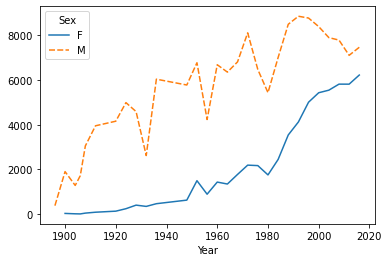

In [103]:
# Research Question 2
# What is the ration of men to women and top 10 most popular sports events for men and women?
summer_df = dataset[dataset['Season'] == 'Summer']

# We omitted the winter because in this case, summer is more descripitive as most games were held in the summer
def ratio_men_women(dataset):
    mf_summer = dataset.groupby(['Year', 'Sex']).size().unstack()
    mf_chart = sns.lineplot(data=mf_summer)
    return mf_chart

def events_by_gender(dataset, sex):
    player_mf = dataset[dataset['Sex'] == sex]
    chart_mf = player_mf.groupby('Event').size().sort_values(ascending= False).head(10)
    return chart_mf


print('Mens Top 10 games')
display(events_by_gender(dataset, 'M'))
print('Womens Top 10 games')
display(events_by_gender(dataset, 'F'))
print('Ration Men to Women')
ratio_men_women(summer_df)